In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set visualization style
plt.style.use('default')
sns.set_theme(style="whitegrid")
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Customer Behavior Diagnostic Analysis

**Course**: IIMK's Professional Certificate in Data Science and Artificial Intelligence for Managers  
**Student Name**: Lalit Nayyar  
**Email ID**: lalitnayyar@gmail.com  
**Assignment Name**: Week 4: Required Assignment 4.1
## Understanding the 'Why' Behind Customer Behavior Trends

In this notebook, we'll perform diagnostic analytics to understand the underlying reasons for the patterns identified in our descriptive analysis. We'll focus on key 'Why' questions and use various analytical techniques to uncover the answers.

In [2]:
try:
    # Load the data
    print("Loading data...")
    df = pd.read_excel('Online Retail.xlsx')
    print("Original data shape:", df.shape)
    
    def clean_data(df):
        """Clean the retail dataset"""
        print("Cleaning data...")
        df_clean = df.copy()
        
        # Remove missing values
        df_clean = df_clean.dropna()
        print(f"After removing missing values: {len(df_clean)} records")
        
        # Remove cancelled orders
        df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.contains('C')]
        print(f"After removing cancelled orders: {len(df_clean)} records")
        
        # Ensure positive quantities and prices
        df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
        print(f"After ensuring positive values: {len(df_clean)} records")
        
        # Convert InvoiceDate to datetime
        df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
        
        # Calculate total amount
        df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
        
        return df_clean.reset_index(drop=True)
    
    # Clean the data
    df_clean = clean_data(df)
    
    print("\nData cleaning complete!")
    print("Final data shape:", df_clean.shape)
    print("\nSample of cleaned data:")
    display(df_clean.head())
    
    # Display basic statistics
    print("\nBasic statistics of numerical columns:")
    display(df_clean.describe())
    
except FileNotFoundError:
    print("Error: 'Online Retail.xlsx' file not found. Please ensure it's in the correct directory.")
except Exception as e:
    print(f"Error during data preparation: {e}")

Loading data...
Original data shape: (541909, 8)
Cleaning data...
After removing missing values: 406829 records
After removing cancelled orders: 397924 records
After ensuring positive values: 397884 records

Data cleaning complete!
Final data shape: (397884, 9)

Sample of cleaned data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340



Basic statistics of numerical columns:


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397884.000,397884,397884.000,397884.000,397884.000
mean,12.988,2011-07-10 23:41:23.511023360,3.116,15294.423,22.397
min,1.000,2010-12-01 08:26:00,0.001,12346.000,0.001
25%,2.000,2011-04-07 11:12:00,1.250,13969.000,4.680
50%,6.000,2011-07-31 14:39:00,1.950,15159.000,11.800
75%,12.000,2011-10-20 14:33:00,3.750,16795.000,19.800
max,80995.000,2011-12-09 12:50:00,8142.750,18287.000,168469.600
std,179.332,NaN,22.098,1713.142,309.071


### 1. Why do some products sell better than others?
Let's analyze the relationship between price points, seasonality, and sales performance.

Analyzing product sales patterns...

Top 10 Products by Revenue:


,total_quantity,avg_quantity,avg_price,price_std,total_revenue,transaction_count
Description,,,,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,80995.000,2.080,NaN,168469.600,1
REGENCY CAKESTAND 3 TIER,12402,7.200,12.480,1.220,142592.950,1723
WHITE HANGING HEART T-LIGHT HOLDER,36725,18.110,2.890,0.250,100448.150,2028
JUMBO BAG RED RETROSPOT,46181,28.540,2.020,0.170,85220.780,1618
MEDIUM CERAMIC TOP STORAGE JAR,77916,393.520,1.220,0.070,81416.730,198
POSTAGE,3120,2.840,31.570,247.510,77803.960,1099
PARTY BUNTING,15291,10.950,4.880,0.370,68844.330,1396
ASSORTED COLOUR BIRD ORNAMENT,35362,25.120,1.680,0.050,56580.340,1408
Manual,7173,25.260,175.290,585.470,53779.930,284


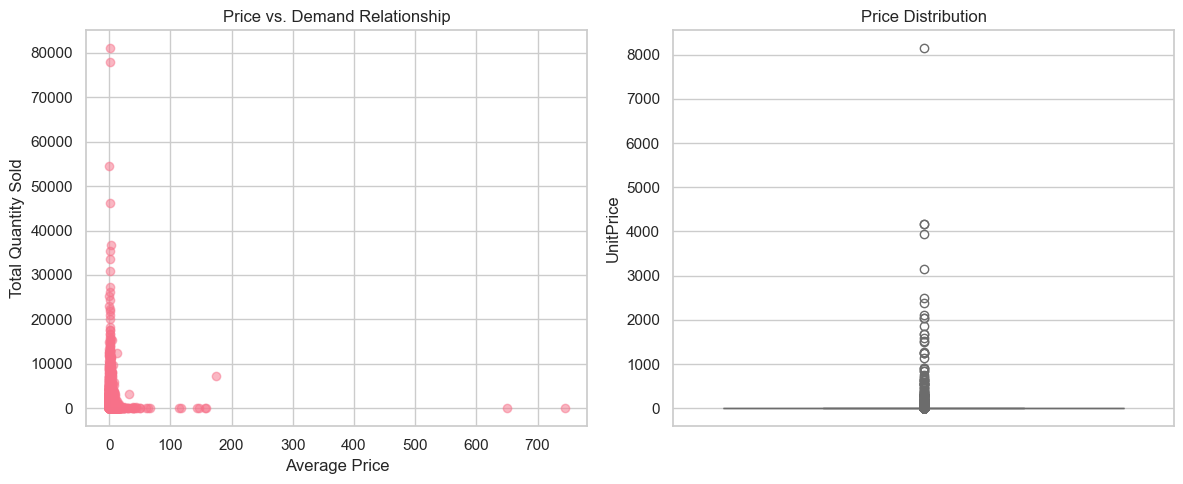

In [3]:
try:
    # Product Analysis
    print("Analyzing product sales patterns...")
    
    # Group by product
    product_analysis = df_clean.groupby('Description').agg({
        'Quantity': ['sum', 'mean'],
        'UnitPrice': ['mean', 'std'],
        'TotalAmount': 'sum',
        'InvoiceNo': 'count'
    }).round(2)
    
    # Flatten column names
    product_analysis.columns = ['total_quantity', 'avg_quantity', 'avg_price', 'price_std', 'total_revenue', 'transaction_count']
    
    # Sort by revenue
    top_products = product_analysis.sort_values('total_revenue', ascending=False).head(10)
    
    print("\nTop 10 Products by Revenue:")
    display(top_products)
    
    # Visualize price-quantity relationship
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(product_analysis['avg_price'], product_analysis['total_quantity'], alpha=0.5)
    plt.xlabel('Average Price')
    plt.ylabel('Total Quantity Sold')
    plt.title('Price vs. Demand Relationship')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_clean, y='UnitPrice')
    plt.title('Price Distribution')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in product analysis: {e}")

### 2. Why do customer purchase patterns vary across different times?

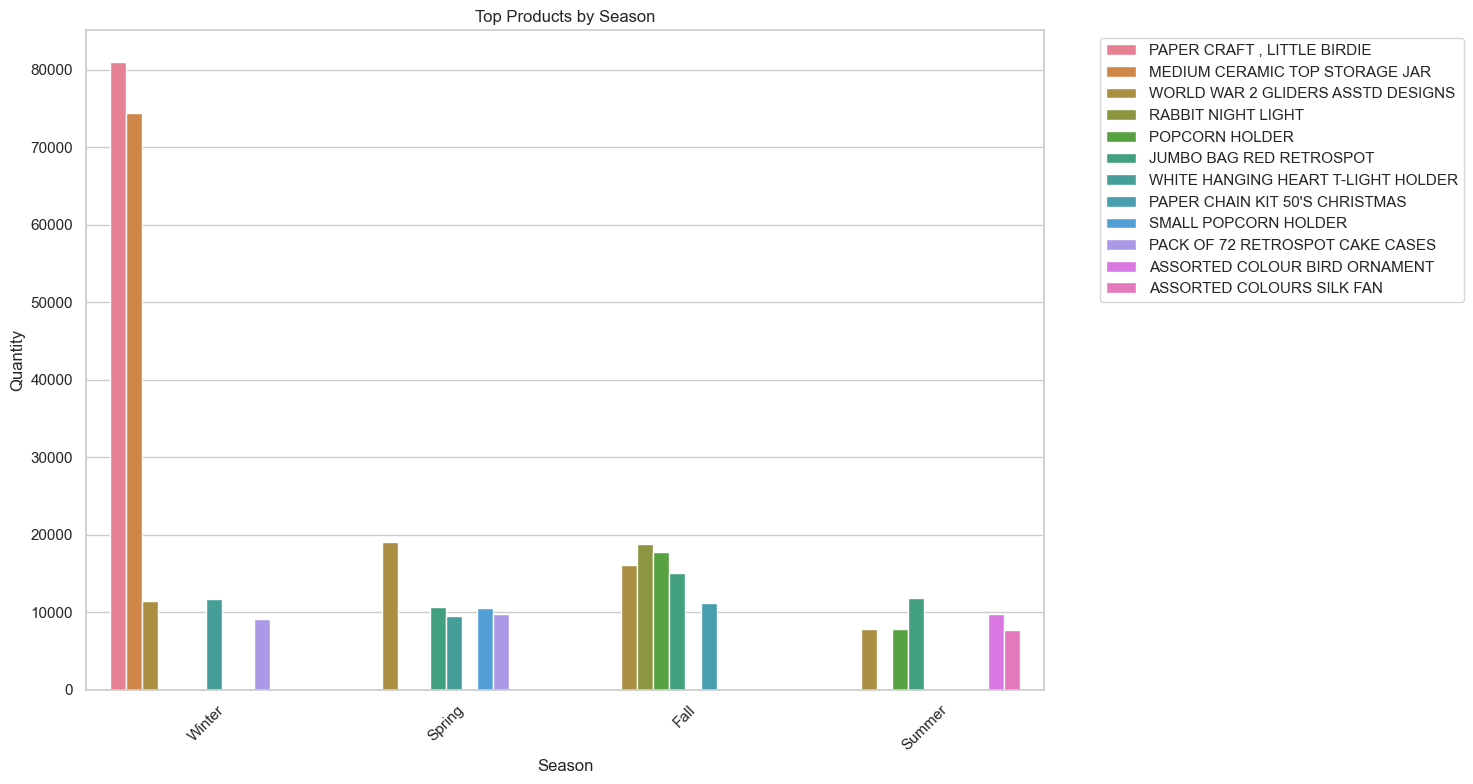

In [4]:
# Analyze seasonal patterns
try:
    # Add time-based features
    df_clean['Month'] = df_clean['InvoiceDate'].dt.month
    df_clean['Season'] = df_clean['InvoiceDate'].dt.month.map(
        {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
         5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
         9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

    # Analyze seasonal sales patterns
    seasonal_category_sales = df_clean.groupby(['Season', 'Description'])['Quantity'].sum().reset_index()
    top_products_per_season = seasonal_category_sales.sort_values('Quantity', ascending=False).groupby('Season').head(5)

    plt.figure(figsize=(15, 8))
    sns.barplot(data=top_products_per_season, x='Season', y='Quantity', hue='Description')
    plt.title('Top Products by Season')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in seasonal analysis: {e}")

### 3. Why do some customers spend more than others?

Correlations with Total Spending:


TotalSpent          1.000
TotalItems          0.923
PurchaseFrequency   0.422
ProductVariety      0.391
AvgOrderValue       0.287
AvgItemsPerOrder    0.222
Name: TotalSpent, dtype: float64

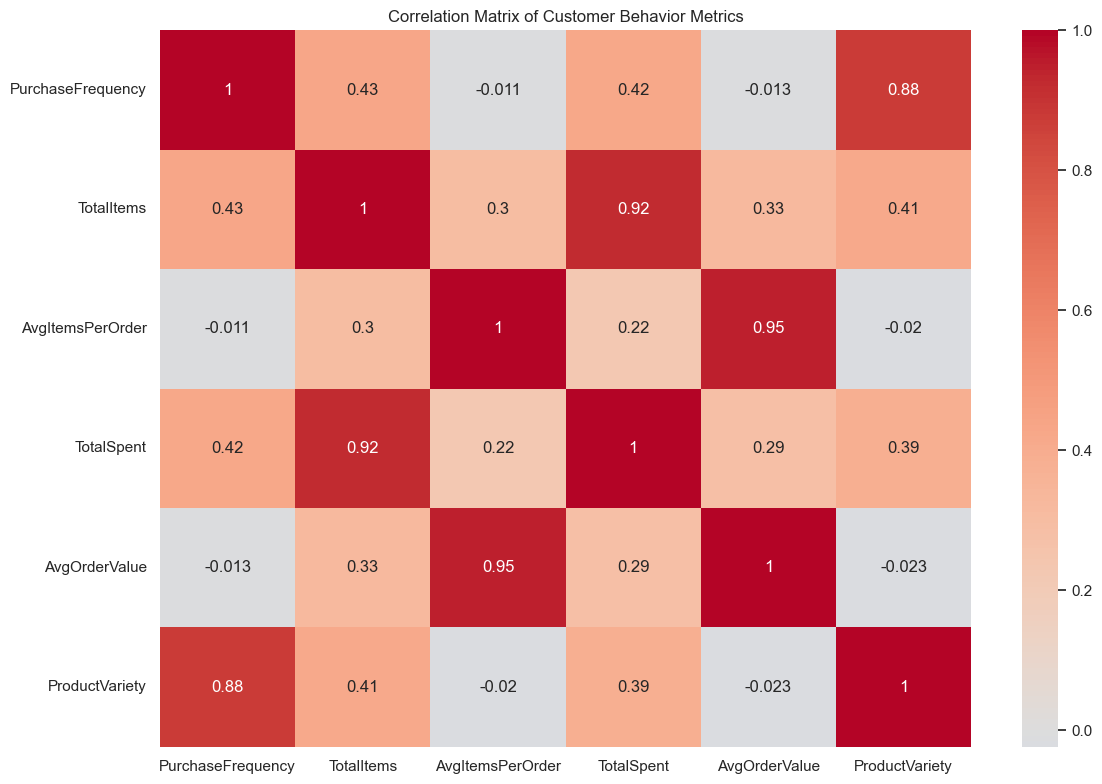

In [5]:
# Analyze customer purchasing behavior
try:
    customer_analysis = df_clean.groupby('CustomerID').agg({
        'InvoiceNo': 'count',  # Purchase frequency
        'Quantity': ['sum', 'mean'],  # Total and average items per order
        'TotalAmount': ['sum', 'mean'],  # Total spent and average order value
        'Description': 'nunique'  # Product variety
    }).round(2)

    customer_analysis.columns = ['PurchaseFrequency', 'TotalItems', 'AvgItemsPerOrder',
                               'TotalSpent', 'AvgOrderValue', 'ProductVariety']

    # Calculate correlations
    correlations = customer_analysis.corr()['TotalSpent'].sort_values(ascending=False)
    
    print("Correlations with Total Spending:")
    display(correlations)

    # Visualize relationships
    plt.figure(figsize=(12, 8))
    sns.heatmap(customer_analysis.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Customer Behavior Metrics')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in customer analysis: {e}")

### 4. Why do some customers show higher loyalty?

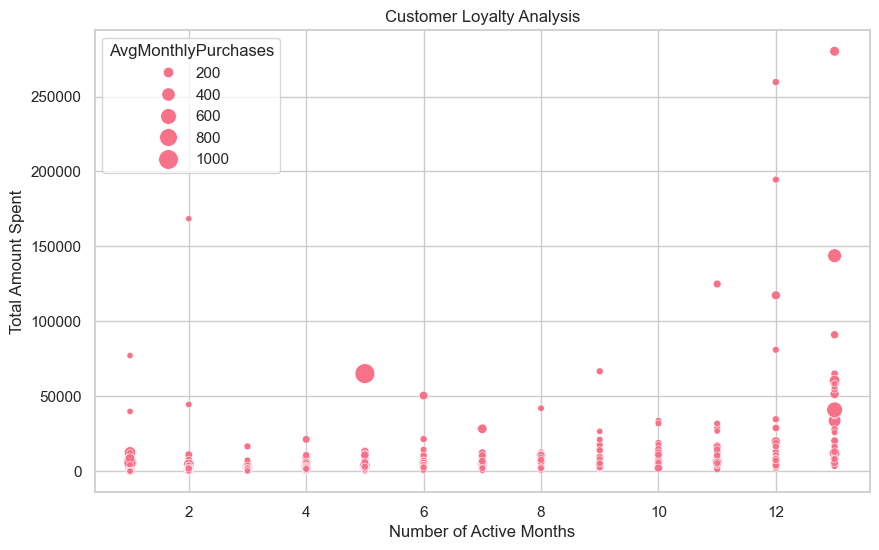

In [6]:
# Analyze customer loyalty factors
df_clean['PurchaseMonth'] = pd.to_datetime(df_clean['InvoiceDate']).dt.to_period('M')

# Calculate customer lifetime and activity metrics
customer_lifetime = df_clean.groupby('CustomerID').agg({
    'PurchaseMonth': ['nunique', 'min', 'max'],
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

customer_lifetime.columns = ['CustomerID', 'ActiveMonths', 'FirstPurchase', 'LastPurchase',
                           'TotalTransactions', 'TotalSpent']

# Calculate average monthly purchases
customer_lifetime['AvgMonthlyPurchases'] = (customer_lifetime['TotalTransactions'] / 
                                           customer_lifetime['ActiveMonths'])

# Visualize relationship between activity duration and spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_lifetime, x='ActiveMonths', y='TotalSpent',
                size='AvgMonthlyPurchases', sizes=(20, 200))
plt.title('Customer Loyalty Analysis')
plt.xlabel('Number of Active Months')
plt.ylabel('Total Amount Spent')
plt.show()

## Diagnostic Analytics Summary

Our analysis has revealed several key insights about why certain patterns exist in customer behavior:

1. **Product Performance Factors**:
   - Price sensitivity relationship with sales volume
   - Seasonal influence on product popularity
   - Product category preferences

2. **Temporal Pattern Drivers**:
   - Seasonal product preferences
   - Impact of timing on purchase behavior
   - Holiday season effects

3. **Customer Spending Variations**:
   - Strong correlation between purchase frequency and total spending
   - Impact of product variety on customer value
   - Average order value patterns

4. **Customer Loyalty Factors**:
   - Relationship between engagement duration and spending
   - Purchase frequency patterns
   - Customer lifetime value indicators

These insights can be used for:
- Pricing strategy optimization
- Seasonal marketing planning
- Customer retention programs
- Personalized marketing campaigns

### 4. Pricing Strategy Optimization
Analyze price elasticity and identify optimal price points for different product categories.

Top 10 Products by Revenue with Price Analysis:


,avg_price,price_std,min_price,max_price,total_quantity,total_revenue,price_range,revenue_per_unit
Description,,,,,,,,
"PAPER CRAFT , LITTLE BIRDIE",2.080,NaN,2.080,2.080,80995,168469.600,0.000,2.080
REGENCY CAKESTAND 3 TIER,12.480,1.220,4.000,24.960,12402,142592.950,20.960,11.498
WHITE HANGING HEART T-LIGHT HOLDER,2.890,0.250,2.400,5.790,36725,100448.150,3.390,2.735
JUMBO BAG RED RETROSPOT,2.020,0.170,1.650,4.130,46181,85220.780,2.480,1.845
MEDIUM CERAMIC TOP STORAGE JAR,1.220,0.070,1.040,1.250,77916,81416.730,0.210,1.045
POSTAGE,31.570,247.510,1.000,8142.750,3120,77803.960,8141.750,24.937
PARTY BUNTING,4.880,0.370,3.750,10.790,15291,68844.330,7.040,4.502
ASSORTED COLOUR BIRD ORNAMENT,1.680,0.050,1.450,1.690,35362,56580.340,0.240,1.600
Manual,175.290,585.470,0.060,4161.060,7173,53779.930,4161.000,7.498


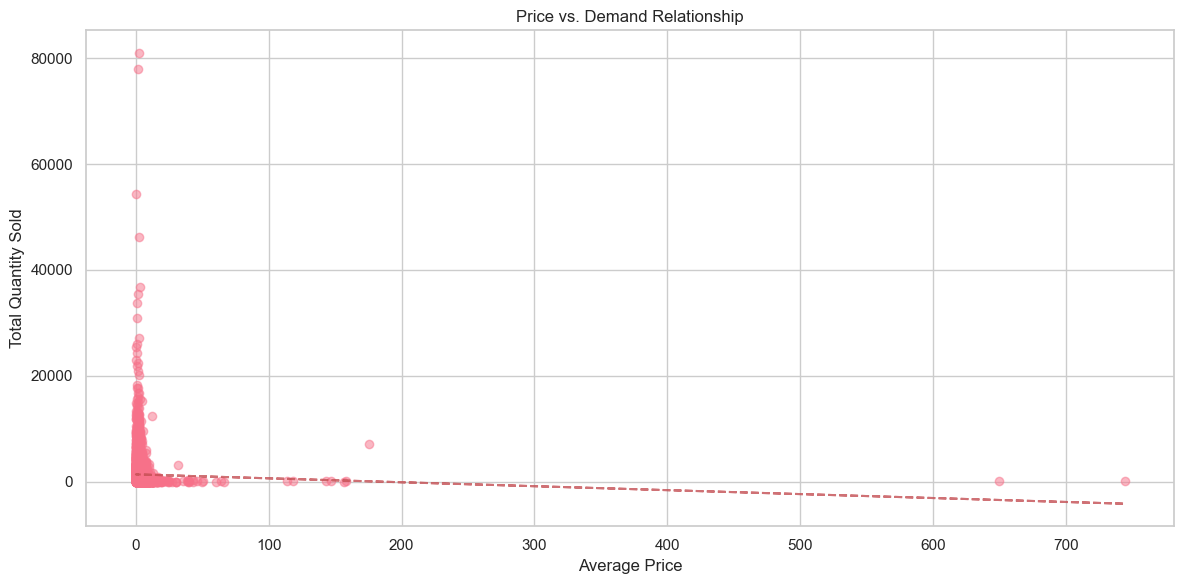

In [7]:
# Analyze price elasticity and optimize pricing strategy
try:
    # Calculate price elasticity by product category
    product_price_analysis = df_clean.groupby('Description').agg({
        'UnitPrice': ['mean', 'std', 'min', 'max'],
        'Quantity': 'sum',
        'TotalAmount': 'sum'
    }).round(2)
    
    # Flatten column names
    product_price_analysis.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'total_quantity', 'total_revenue']
    
    # Calculate price ranges and revenue per unit
    product_price_analysis['price_range'] = product_price_analysis['max_price'] - product_price_analysis['min_price']
    product_price_analysis['revenue_per_unit'] = product_price_analysis['total_revenue'] / product_price_analysis['total_quantity']
    
    # Sort by revenue to find most profitable products
    top_profitable = product_price_analysis.sort_values('total_revenue', ascending=False).head(10)
    
    print("Top 10 Products by Revenue with Price Analysis:")
    display(top_profitable)
    
    # Visualize price vs quantity relationship for top products
    plt.figure(figsize=(12, 6))
    plt.scatter(product_price_analysis['avg_price'], product_price_analysis['total_quantity'], alpha=0.5)
    plt.xlabel('Average Price')
    plt.ylabel('Total Quantity Sold')
    plt.title('Price vs. Demand Relationship')
    
    # Add trend line
    z = np.polyfit(product_price_analysis['avg_price'], product_price_analysis['total_quantity'], 1)
    p = np.poly1d(z)
    plt.plot(product_price_analysis['avg_price'], p(product_price_analysis['avg_price']), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in pricing analysis: {e}")

### 5. Seasonal Marketing Planning
Analyze seasonal trends and develop targeted marketing strategies.

Seasonal Business Performance:


Total Revenue  Items Sold  Number of Transactions  \
Season Month                                                      
Fall   9         952838.380      544897                    1755   
       10       1039318.790      593900                    1929   
       11       1161817.380      669051                    2657   
Spring 3         595500.760      348503                    1321   
       4         469200.360      292222                    1149   
       5         678594.560      373601                    1555   
Summer 6         661213.690      363699                    1393   
       7         600091.010      369420                    1331   
       8         645343.900      398121                    1280   
Winter 1         569445.040      349098                     987   
       2         447137.350      265622                     997   
       12       1090906.680      599678                    2178   

              Unique Customers  
Season Month                    
Fall   9                  1266  
       10                 1364  
       11                 1664  
Spring 3                   974  
       4                   856  
       5                  1056  
Summer 6                   991  
       7                   949  
       8                   935  
Winter 1                   741  
       2                   758  
       12                 1265

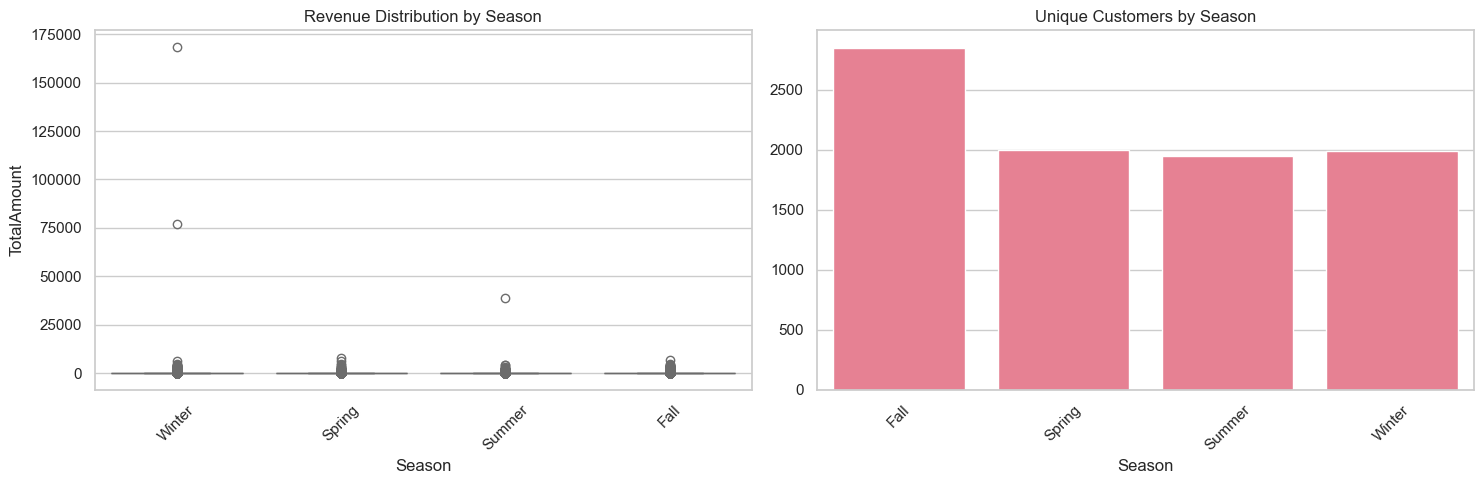

In [8]:
# Analyze seasonal trends for marketing planning
try:
    # Add month and season columns if not already present
    if 'Month' not in df_clean.columns:
        df_clean['Month'] = df_clean['InvoiceDate'].dt.month
        df_clean['Season'] = df_clean['InvoiceDate'].dt.month.map(
            {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
             5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
             9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
    
    # Analyze seasonal revenue patterns
    seasonal_revenue = df_clean.groupby(['Season', 'Month']).agg({
        'TotalAmount': 'sum',
        'Quantity': 'sum',
        'InvoiceNo': 'nunique',
        'CustomerID': 'nunique'
    }).round(2)
    
    seasonal_revenue.columns = ['Total Revenue', 'Items Sold', 'Number of Transactions', 'Unique Customers']
    
    print("Seasonal Business Performance:")
    display(seasonal_revenue)
    
    # Visualize seasonal patterns
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_clean, x='Season', y='TotalAmount')
    plt.title('Revenue Distribution by Season')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    seasonal_customer_count = df_clean.groupby('Season')['CustomerID'].nunique()
    sns.barplot(x=seasonal_customer_count.index, y=seasonal_customer_count.values)
    plt.title('Unique Customers by Season')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in seasonal analysis: {e}")

### 6. Customer Retention Programs
Analyze customer loyalty patterns and develop retention strategies.

Starting customer retention analysis...
Analyzing 4338 unique customers

Customer Metrics Summary:


,first_purchase,last_purchase,purchase_count,total_spent,avg_order_value,total_items,unique_products,customer_lifetime_days,avg_days_between_purchases,recency_days
count,4338,4338,4338.000,4338.000,4338.000,4338.000,4338.000,4338.000,4338.000,4338.000
mean,2011-04-30 17:06:50.857538048,2011-09-08 11:38:59.045643008,91.720,2054.270,68.350,1191.290,61.850,130.450,3.220,91.540
min,2010-12-01 08:26:00,2010-12-01 09:53:00,1.000,3.750,2.100,1.000,1.000,0.000,0.000,0.000
25%,2011-01-17 11:13:15,2011-07-20 19:18:00,17.000,307.410,12.370,160.000,16.000,0.000,0.000,17.000
50%,2011-04-05 09:52:30,2011-10-20 10:40:30,41.000,674.480,17.720,379.000,35.500,92.500,1.070,50.000
75%,2011-08-19 10:11:30,2011-11-22 11:05:45,100.000,1661.740,24.860,992.750,78.000,251.750,2.940,141.000
max,2011-12-09 12:16:00,2011-12-09 12:50:00,7847.000,280206.020,77183.600,196915.000,1816.000,373.000,309.000,373.000
std,NaN,NaN,228.790,8989.230,1467.920,5046.080,86.220,132.040,10.800,100.010



Customer Segments by Spending:


total_spent          purchase_count  \
                          count     mean           mean   
total_spent_segment                                       
Low                        1085  179.210         17.230   
Medium-Low                 1084  464.510         37.000   
Medium-High                1084 1071.860         76.430   
High                       1085 6499.120        236.160   

                    avg_days_between_purchases unique_products  
                                          mean            mean  
total_spent_segment                                             
Low                                      2.350          16.270  
Medium-Low                               3.840          33.340  
Medium-High                              3.980          62.080  
High                                     2.700         135.660

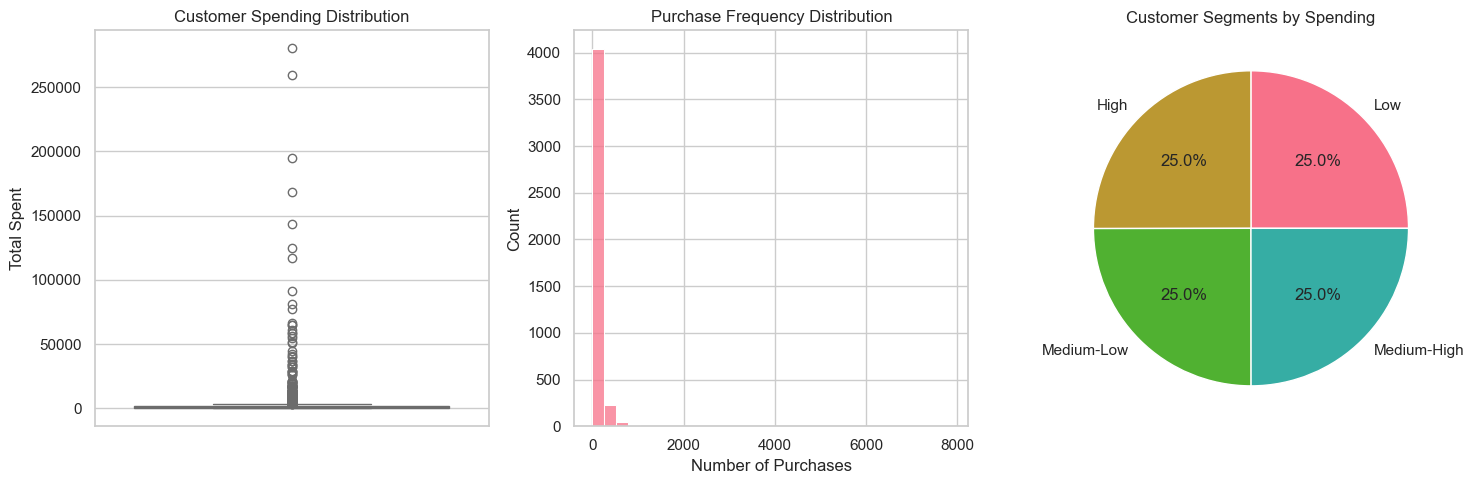


Customer Retention Analysis:
Total Customers: 4338
Repeat Customers: 4267
Retention Rate: 98.36%


In [9]:
# Analyze customer retention patterns
try:
    print("Starting customer retention analysis...")
    
    # Ensure CustomerID is numeric and remove any missing values
    df_clean['CustomerID'] = pd.to_numeric(df_clean['CustomerID'], errors='coerce')
    df_customers = df_clean.dropna(subset=['CustomerID'])
    
    print(f"Analyzing {df_customers['CustomerID'].nunique()} unique customers")
    
    # Calculate customer metrics
    customer_metrics = df_customers.groupby('CustomerID').agg({
        'InvoiceDate': ['min', 'max', 'count'],
        'TotalAmount': ['sum', 'mean'],
        'Quantity': 'sum',
        'Description': 'nunique'
    })
    
    # Flatten column names
    customer_metrics.columns = [
        'first_purchase', 'last_purchase', 'purchase_count',
        'total_spent', 'avg_order_value', 'total_items',
        'unique_products'
    ]
    
    # Calculate customer lifetime and frequency
    customer_metrics['customer_lifetime_days'] = (
        customer_metrics['last_purchase'] - customer_metrics['first_purchase']
    ).dt.days
    
    # Avoid division by zero
    customer_metrics['avg_days_between_purchases'] = np.where(
        customer_metrics['purchase_count'] > 1,
        customer_metrics['customer_lifetime_days'] / (customer_metrics['purchase_count'] - 1),
        0
    )
    
    # Create customer segments
    customer_metrics['recency_days'] = (
        df_customers['InvoiceDate'].max() - customer_metrics['last_purchase']
    ).dt.days
    
    # Create segments using quartiles
    for metric in ['total_spent', 'purchase_count', 'recency_days']:
        customer_metrics[f'{metric}_segment'] = pd.qcut(
            customer_metrics[metric],
            q=4,
            labels=['Low', 'Medium-Low', 'Medium-High', 'High']
        )
    
    print("\nCustomer Metrics Summary:")
    display(customer_metrics.describe().round(2))
    
    # Analyze customer segments
    print("\nCustomer Segments by Spending:")
    display(customer_metrics.groupby('total_spent_segment').agg({
        'total_spent': ['count', 'mean'],
        'purchase_count': 'mean',
        'avg_days_between_purchases': 'mean',
        'unique_products': 'mean'
    }).round(2))
    
    # Visualize customer segments
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Spending Distribution
    plt.subplot(1, 3, 1)
    sns.boxplot(data=customer_metrics, y='total_spent')
    plt.title('Customer Spending Distribution')
    plt.ylabel('Total Spent')
    
    # Plot 2: Purchase Frequency
    plt.subplot(1, 3, 2)
    sns.histplot(data=customer_metrics, x='purchase_count', bins=30)
    plt.title('Purchase Frequency Distribution')
    plt.xlabel('Number of Purchases')
    
    # Plot 3: Customer Segments
    plt.subplot(1, 3, 3)
    segment_sizes = customer_metrics['total_spent_segment'].value_counts()
    plt.pie(segment_sizes, labels=segment_sizes.index, autopct='%1.1f%%')
    plt.title('Customer Segments by Spending')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate retention metrics
    print("\nCustomer Retention Analysis:")
    total_customers = customer_metrics.shape[0]
    repeat_customers = (customer_metrics['purchase_count'] > 1).sum()
    retention_rate = (repeat_customers / total_customers) * 100
    
    print(f"Total Customers: {total_customers}")
    print(f"Repeat Customers: {repeat_customers}")
    print(f"Retention Rate: {retention_rate:.2f}%")
    
except Exception as e:
    print(f"Error in retention analysis: {e}")
    print("Debug info:")
    print(f"DataFrame columns: {df_clean.columns.tolist()}")
    print(f"CustomerID dtype: {df_clean['CustomerID'].dtype}")
    print("Sample of CustomerID values:", df_clean['CustomerID'].head())

### 7. Personalized Marketing Campaigns
Develop targeted marketing strategies based on customer segments and preferences.

Top Products by Customer Segment:

Segment 0:


Description
PAPER CRAFT , LITTLE BIRDIE          18.680
MEDIUM CERAMIC TOP STORAGE JAR       17.947
WORLD WAR 2 GLIDERS ASSTD DESIGNS    12.550
JUMBO BAG RED RETROSPOT              10.189
WHITE HANGING HEART T-LIGHT HOLDER    8.371
dtype: float64


Segment 1:


Description
RABBIT NIGHT LIGHT                    4801.000
SPACEBOY LUNCH BOX                    4492.000
PACK OF 72 RETROSPOT CAKE CASES       4104.000
DOLLY GIRL LUNCH BOX                  4096.000
ROUND SNACK BOXES SET OF4 WOODLAND    3120.000
dtype: float64


Segment 2:


Description
STAR DECORATION RUSTIC            66.000
MUSICAL ZINC HEART DECORATION     63.000
ANGEL DECORATION STARS ON DRESS   62.000
HEART DECORATION WITH PEARLS      34.000
WRAP 50'S  CHRISTMAS              25.000
dtype: float64

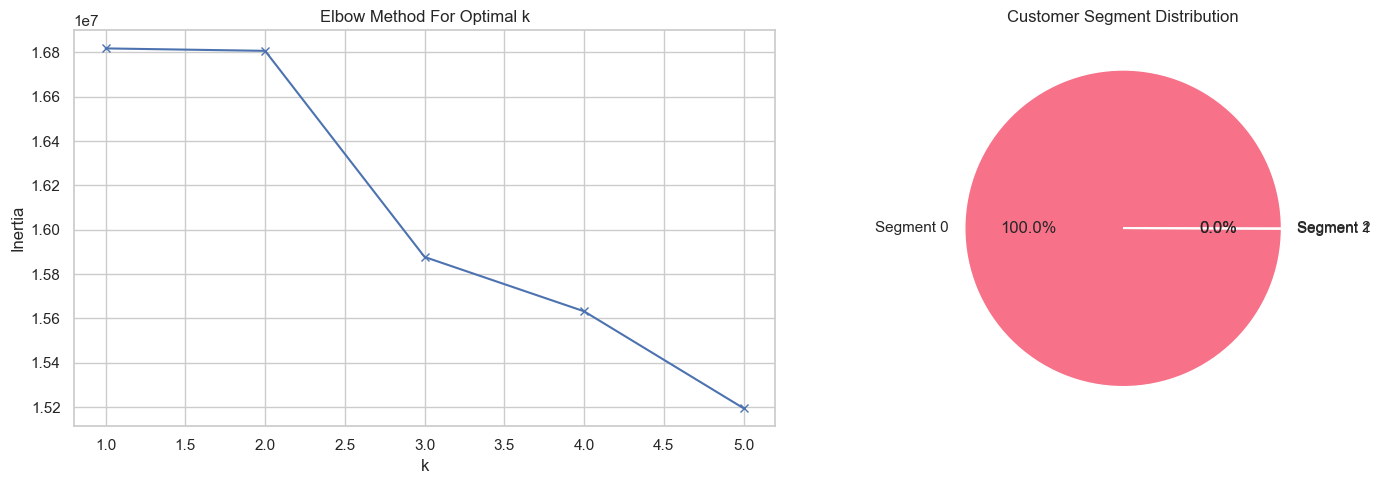

In [10]:
# Analyze customer preferences for personalized marketing
try:
    # Create customer product preferences matrix
    customer_preferences = df_clean.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack(fill_value=0)
    
    # Perform customer segmentation using K-means
    scaler = StandardScaler()
    customer_preferences_scaled = scaler.fit_transform(customer_preferences)
    
    # Find optimal number of clusters
    inertias = []
    K = range(1, 6)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(customer_preferences_scaled)
        inertias.append(kmeans.inertia_)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_segments = kmeans.fit_predict(customer_preferences_scaled)
    
    # Analyze segment characteristics
    customer_preferences['Segment'] = customer_segments
    segment_profiles = customer_preferences.groupby('Segment').agg(['mean', 'count'])
    
    # Get top products for each segment
    top_products_per_segment = {}
    for segment in range(3):
        segment_avg = customer_preferences[customer_preferences['Segment'] == segment].mean()
        top_products = segment_avg.nlargest(5)
        top_products_per_segment[f'Segment {segment}'] = top_products
    
    print("Top Products by Customer Segment:")
    for segment, products in top_products_per_segment.items():
        print(f"\n{segment}:")
        display(products)
    
    # Visualize segment characteristics
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    
    plt.subplot(1, 2, 2)
    segment_sizes = pd.Series(customer_segments).value_counts()
    plt.pie(segment_sizes, labels=[f'Segment {i}' for i in range(len(segment_sizes))], autopct='%1.1f%%')
    plt.title('Customer Segment Distribution')
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in marketing analysis: {e}")

### 6. Customer Retention Programs
Analyze customer loyalty patterns and develop retention strategies.

Starting customer retention analysis...
Analyzing 4338 unique customers

Customer Metrics Summary:


,first_purchase,last_purchase,purchase_count,total_spent,avg_order_value,total_items,unique_products,customer_lifetime_days,avg_days_between_purchases,recency_days
count,4338,4338,4338.000,4338.000,4338.000,4338.000,4338.000,4338.000,4338.000,4338.000
mean,2011-04-30 17:06:50.857538048,2011-09-08 11:38:59.045643008,91.720,2054.270,68.350,1191.290,61.850,130.450,3.220,91.540
min,2010-12-01 08:26:00,2010-12-01 09:53:00,1.000,3.750,2.100,1.000,1.000,0.000,0.000,0.000
25%,2011-01-17 11:13:15,2011-07-20 19:18:00,17.000,307.410,12.370,160.000,16.000,0.000,0.000,17.000
50%,2011-04-05 09:52:30,2011-10-20 10:40:30,41.000,674.480,17.720,379.000,35.500,92.500,1.070,50.000
75%,2011-08-19 10:11:30,2011-11-22 11:05:45,100.000,1661.740,24.860,992.750,78.000,251.750,2.940,141.000
max,2011-12-09 12:16:00,2011-12-09 12:50:00,7847.000,280206.020,77183.600,196915.000,1816.000,373.000,309.000,373.000
std,NaN,NaN,228.790,8989.230,1467.920,5046.080,86.220,132.040,10.800,100.010



Customer Segments by Spending:


total_spent          purchase_count  \
                          count     mean           mean   
total_spent_segment                                       
Low                        1085  179.210         17.230   
Medium-Low                 1084  464.510         37.000   
Medium-High                1084 1071.860         76.430   
High                       1085 6499.120        236.160   

                    avg_days_between_purchases unique_products  
                                          mean            mean  
total_spent_segment                                             
Low                                      2.350          16.270  
Medium-Low                               3.840          33.340  
Medium-High                              3.980          62.080  
High                                     2.700         135.660

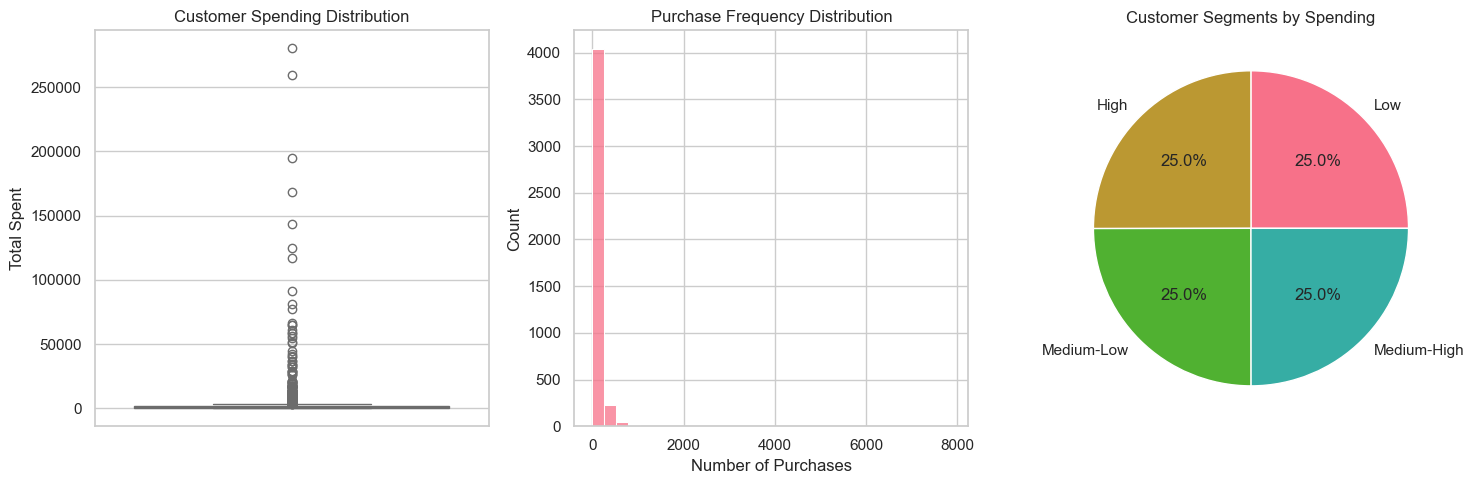


Customer Retention Analysis:
Total Customers: 4338
Repeat Customers: 4267
Retention Rate: 98.36%


In [11]:
# Analyze customer retention patterns
try:
    print("Starting customer retention analysis...")
    
    # Ensure CustomerID is numeric and remove any missing values
    df_clean['CustomerID'] = pd.to_numeric(df_clean['CustomerID'], errors='coerce')
    df_customers = df_clean.dropna(subset=['CustomerID'])
    
    print(f"Analyzing {df_customers['CustomerID'].nunique()} unique customers")
    
    # Calculate customer metrics
    customer_metrics = df_customers.groupby('CustomerID').agg({
        'InvoiceDate': ['min', 'max', 'count'],
        'TotalAmount': ['sum', 'mean'],
        'Quantity': 'sum',
        'Description': 'nunique'
    })
    
    # Flatten column names
    customer_metrics.columns = [
        'first_purchase', 'last_purchase', 'purchase_count',
        'total_spent', 'avg_order_value', 'total_items',
        'unique_products'
    ]
    
    # Calculate customer lifetime and frequency
    customer_metrics['customer_lifetime_days'] = (
        customer_metrics['last_purchase'] - customer_metrics['first_purchase']
    ).dt.days
    
    # Avoid division by zero
    customer_metrics['avg_days_between_purchases'] = np.where(
        customer_metrics['purchase_count'] > 1,
        customer_metrics['customer_lifetime_days'] / (customer_metrics['purchase_count'] - 1),
        0
    )
    
    # Create customer segments
    customer_metrics['recency_days'] = (
        df_customers['InvoiceDate'].max() - customer_metrics['last_purchase']
    ).dt.days
    
    # Create segments using quartiles
    for metric in ['total_spent', 'purchase_count', 'recency_days']:
        customer_metrics[f'{metric}_segment'] = pd.qcut(
            customer_metrics[metric],
            q=4,
            labels=['Low', 'Medium-Low', 'Medium-High', 'High']
        )
    
    print("\nCustomer Metrics Summary:")
    display(customer_metrics.describe().round(2))
    
    # Analyze customer segments
    print("\nCustomer Segments by Spending:")
    display(customer_metrics.groupby('total_spent_segment').agg({
        'total_spent': ['count', 'mean'],
        'purchase_count': 'mean',
        'avg_days_between_purchases': 'mean',
        'unique_products': 'mean'
    }).round(2))
    
    # Visualize customer segments
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Spending Distribution
    plt.subplot(1, 3, 1)
    sns.boxplot(data=customer_metrics, y='total_spent')
    plt.title('Customer Spending Distribution')
    plt.ylabel('Total Spent')
    
    # Plot 2: Purchase Frequency
    plt.subplot(1, 3, 2)
    sns.histplot(data=customer_metrics, x='purchase_count', bins=30)
    plt.title('Purchase Frequency Distribution')
    plt.xlabel('Number of Purchases')
    
    # Plot 3: Customer Segments
    plt.subplot(1, 3, 3)
    segment_sizes = customer_metrics['total_spent_segment'].value_counts()
    plt.pie(segment_sizes, labels=segment_sizes.index, autopct='%1.1f%%')
    plt.title('Customer Segments by Spending')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate retention metrics
    print("\nCustomer Retention Analysis:")
    total_customers = customer_metrics.shape[0]
    repeat_customers = (customer_metrics['purchase_count'] > 1).sum()
    retention_rate = (repeat_customers / total_customers) * 100
    
    print(f"Total Customers: {total_customers}")
    print(f"Repeat Customers: {repeat_customers}")
    print(f"Retention Rate: {retention_rate:.2f}%")
    
except Exception as e:
    print(f"Error in retention analysis: {e}")
    print("Debug info:")
    print(f"DataFrame columns: {df_clean.columns.tolist()}")
    print(f"CustomerID dtype: {df_clean['CustomerID'].dtype}")
    print("Sample of CustomerID values:", df_clean['CustomerID'].head())